 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

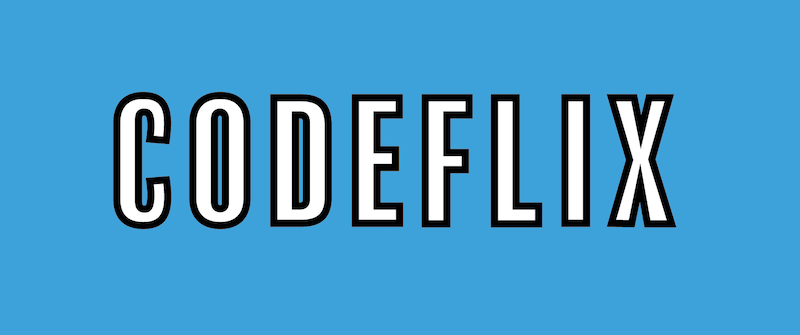

In [3]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

display(Image(generic_image))

In [6]:
class Video:
    def __init__(self):
        self.title = ""
        self.length = timedelta()
        self.link = generic_image

    def play(self):
        print(f"Now Playing {self.title}")
        display(Image(self.link))

    def pause(self):
        print("Video Paused")

    def __repr__(self):
        return f"{self.title} is {self.link.seconds} seconds long."



Now Playing Cool Video


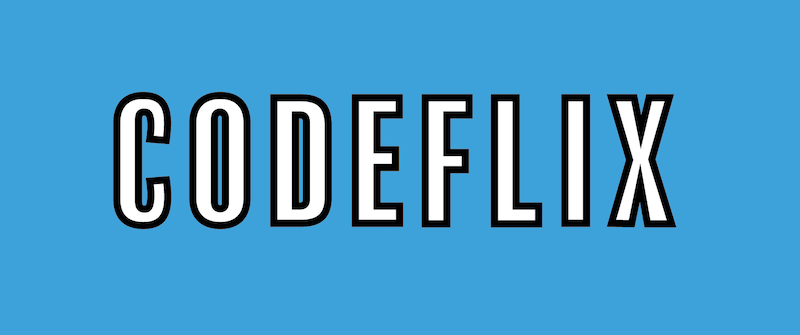

In [8]:
vid = Video()
vid.title = "Cool Video"

vid.play()

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [9]:
#class child(parent)
#all episodes are videos but not all videos are episodes

class Episode(Video):
    def __init__(self,data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired =data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.length = timedelta(minutes= data['runtime'])
        if data["image"]:
            self.link = data["image"]['medium']
        self.title = data["name"]

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [10]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []

    def get_info(self, query=""):
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: status code {r.status_code}")
                query = ""

        # Use data to fill attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = data['genres']
        self.summary = data["summary"]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
        
        #API Call for episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: status code: {r.status_code}")
            return
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")


    def play(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? (Y/N)")    
                if watching.lower().strip() not in ("yes", 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)

    def __len__(self):
        return len(self.episodes)

    def __repr__(self):
        return f"Title: {self.title}"


## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [18]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None


    # add_user
    def add_user(self, name=""):
        if not name:
            name = input("What is the name of your new user? ")
        self.users.append(name)
        self.choose_user()

    # choose_user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user.")

    # add_to_watch_list
    def add_to_watch_list(self, query=""):
        show = Series()
        show.get_info(query)
        self.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist")

    # choose_from_watch_list
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series}  |  Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
        watch = input("What do you want to watch?")

        if watch.lower() in list(map( lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play()
        else:
            response = input(f"{watch} is not in your watch list. Would you like to add it? Y/N")

            if response.lower() in ("yes", "y"):
                self.add_to_watch_list(watch)
                self.watch_list[-1].play()

    # Show and filter watchlist #NEW FEATURE!!!!
    def show_watchlist(self):
        for series in self.watch_list:
            print(f"\n\n{series}  |  Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
        response = input("Would you like to filter through your list by genre? ")
        if response.lower().strip() in ('yes', 'y'):
            genre = input("What genre are you looking for? ")
            for series in self.watch_list:
                if genre in series.genres:
                    print(f"\n\n{series}  |  Episodes: {len(series)}")
        elif response.lower().strip() in ('no', 'n'):
            return

        watch = input("What do you want to watch?")
        if watch.lower() in list(map( lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play()
        else:
            response = input(f"{watch} is not in your watch list. Would you like to add it? Y/N")

            if response.lower() in ("yes", "y"):
                self.add_to_watch_list(watch)
                self.watch_list[-1].play()
            elif response.lower() in ('n', 'no'):
                return 

                
            



    # run
    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """
        display(Image(generic_image))

        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile:")
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
                What would you like to do?


                Search - Search for shows
                Watch  - Pick something from your watch list
                Add    - Add a new user
                Quit   - Close the app
                        """)
        while True:
            response = input("""What would you like to do?

                                Search?
                                Watch?
                                Add?
                                Show your watchlist?
                                Quit?
                                
                                
                                                """)

            if response.lower().strip() == "search":
                self.add_to_watch_list()
            elif response.lower().strip() == "watch":
                self.choose_from_watch_list()
                
            elif response.lower().strip() == "add":
                self.add_to_watch_list()
            elif response.lower().strip() == "quit":
                print(f"Thanks for watching {self.current_user}")
                break
            elif response.lower().strip() in ('show', 'watchlist', 'show watchlist'):
                self.show_watchlist()


            else:
                print("Invalid input....try agian..")


            




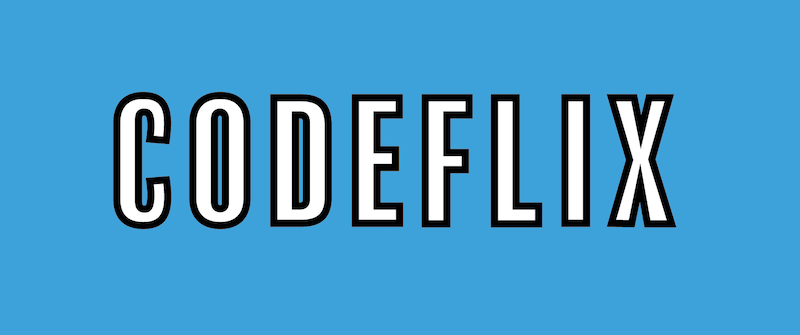

Users: 
sam
sam

                What would you like to do?


                Search - Search for shows
                Watch  - Pick something from your watch list
                Add    - Add a new user
                Quit   - Close the app
                        
Breaking Bad has 62 episodes.
Breaking Bad has been added to the watchlist
Family Guy has 390 episodes.
Family Guy has been added to the watchlist
Stranger Things has 34 episodes.
Stranger Things has been added to the watchlist


Title: Breaking Bad  |  Episodes: 62

Summary: 
<p><b>Breaking Bad</b> follows protagonist Walter White, a chemistry teacher who lives in New Mexico with his wife and teenage son who has cerebral palsy. White is diagnosed with Stage III cancer and given a prognosis of two years left to live. With a new sense of fearlessness based on his medical prognosis, and a desire to secure his family's financial security, White chooses to enter a dangerous world of drugs and crime and ascends to power in thi

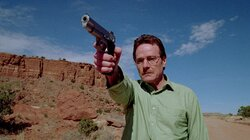

Now Playing Cat's in the Bag...


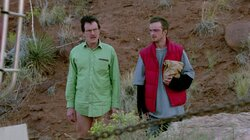

Now Playing ...and the Bag's in the River


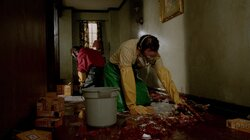



Title: Breaking Bad  |  Episodes: 62

Summary: 
<p><b>Breaking Bad</b> follows protagonist Walter White, a chemistry teacher who lives in New Mexico with his wife and teenage son who has cerebral palsy. White is diagnosed with Stage III cancer and given a prognosis of two years left to live. With a new sense of fearlessness based on his medical prognosis, and a desire to secure his family's financial security, White chooses to enter a dangerous world of drugs and crime and ascends to power in this world. The series explores how a fatal diagnosis such as White's releases a typical man from the daily concerns and constraints of normal society and follows his transformation from mild family man to a kingpin of the drug trade.</p>


Title: Family Guy  |  Episodes: 390

Summary: 
<p><b>Family Guy</b> follows Peter Griffin the endearingly ignorant dad, and his hilariously offbeat family of middle-class New Englanders in Quahog, RI. Lois is Peter's wife, a stay-at-home mom with no patience 

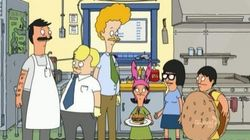

Now Playing Crawl Space


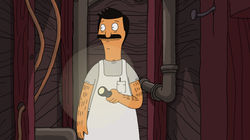

Now Playing Sacred Cow


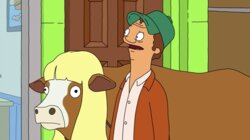

Thanks for watching sam


In [19]:
codeFlix = Theater()
codeFlix.run()


##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...